In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
# np.random.seed(1)

In [0]:
# creation of orange points
x1 = np.random.normal(3, 0.2, 50)
x2 = np.random.normal(2.5, 0.3, 50)

In [0]:
# creation of green points
x1_green = np.random.normal(1, 0.2, 50)
x2_green = np.random.normal(2, 0.2, 50)


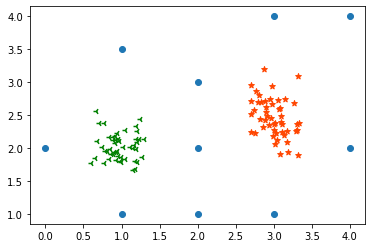

In [0]:
plt.scatter([1, 2, 3, 0, 2, 4, 2, 1, 3, 4], [1, 1, 1, 2, 2, 2, 3, 3.5, 4, 4])
plt.scatter(x1 ,x2, color='orangered', marker = "*") 
# plt.xlim(-1, 5)
# plt.ylim(0, 5)
plt.scatter(x1_green ,x2_green, color='green', marker = "3") 
plt.show()

In [0]:
class Neuron:
  def __init__(self, weights, bias, epoch, activation_function, learning_rate):
    self.weights = weights
    self.bias = bias
    self.epoch = epoch
    self.activation_function = activation_function
    self.learning_rate = learning_rate
    self.counter = 0
  
  def calculate_net_value(self, inputs):
    return np.dot(inputs, self.weights) + self.bias

  def calculate_h_value(self, inputs):
    return(self.activation_function(self.calculate_net_value(inputs)))

  def update(self, target, inputs):
    self.bias = self.bias + self.learning_rate * (target - self.calculate_net_value(inputs))
    self.weights = self.weights +  np.dot(self.learning_rate * int(target - self.calculate_net_value(inputs)) , inputs)
    self.counter += 1


  def check_end_condition(self):
    if self.counter >= self.epoch:
      return True
    else:
      return False

  def get_weights(self):
    return self.weights

  def get_bias(self):
    return self.bias

  def set_weight(self, w):
    self.weights = w

  def set_bias(self, b):
    self.bias = b

In [0]:
def activation_function(x):
  if x >= 0:
    return 1
  else:
    return -1


def and_operator(a, b):
  if a == 1 and b == 1:
    return 1
  elif a == 1 and b == -1:
    return -1
  elif a == -1 and b == 1:
    return -1
  elif a == -1 and b == -1:
    return 1

In [0]:
class Network:
  def __init__(self, inputs, neuron_number):
    self.neuron_number = neuron_number
    self.inputs = inputs
    self.neurons = []

  def make_neurons(self):
    for i in range(self.neuron_number):
      w = np.random.normal(1, 3, 2)
      a = 1
      if i == 0:
        w = [3, 1]
        a = -8.5
      if i == 1:
        w = [-2, 1]
        a = 7
      if i == 2:
        w = [-0.5, 1]
        a = 2
      self.neurons.append(Neuron(w, a, 200, activation_function, 0.0001))

  def train(self, limit, class_number, offset):
    self.make_neurons()
    if class_number == 2:
      n = random.randint(2, self.neuron_number - 1)
      self.neurons[n].set_weight([-1, 2.8])
      self.neurons[n].set_bias(13)
    if class_number == 1:
      n = random.randint(3, self.neuron_number - 1)
      self.neurons[n].set_weight([-1.5, 1])
      self.neurons[n].set_bias(5)


    
    # for h in range(len(self.inputs)):
    h = [j for j in range(110)]
    index_list = random.shuffle(h)
    for i in h:

      hidden_out = []
      for j in range(len(self.neurons)):
        hidden_out.append(self.neurons[j].calculate_h_value(inputs[i]))
      and_result = 1
      for l in range(len(hidden_out)):
        and_result = and_operator(and_result, hidden_out[l])
      
      if (i < limit and class_number == 1) or (i >= limit + offset and class_number == 2):
        target = 1
      elif (i < limit + offset and class_number == 2) or (i >= limit and class_number == 1):
        target = -1

      if and_result == 1 and target == -1:
        net_values = []
        for j in range(len(self.neurons)):
          net_values.append(self.neurons[j].calculate_net_value(inputs[i]))
        min_net_value = 99999
        index = 0
        # print("net values is ", len(net_values))
        for k in range(len(net_values)):
          # print(type(net_values[k]))
          if net_values[k] < min_net_value:
            min_net_value = net_values[k]
            index = k
        self.neurons[index].update(target, self.inputs[i])
        
      elif and_result == -1 and target == 1:
        for j in range(len(self.neurons)):
          if hidden_out[j] == -1:
            self.neurons[j].update(target, self.inputs[i])
      
    weights = []
    bias = []
    for i in range(len(self.neurons)):
      weights.append(self.neurons[i].get_weights())  
      bias.append(self.neurons[i].get_bias())
    return weights, bias

  def test(self, limit, data, class_number, offset):
        total = 0
        error = 0
        for i in range(len(self.inputs)):
            hidden_out = []
            for j in range(len(self.neurons)):
                hidden_out.append(self.neurons[j].calculate_h_value(inputs[i]))
            # and_result = and_operator(and_operator(hidden_out[3], hidden_out[2]), and_operator(hidden_out[1], hidden_out[0]))
            and_result = 1
            for k in range(len(hidden_out)):
                and_result = and_operator(and_result, hidden_out[k])
            total += 1
            
            if class_number == 1:
                if i < limit:
                  if and_result == -1:
                    error += 1
                else:
                  if and_result == 1:
                    error += 1

            if class_number == 2:
                if i >= limit + offset:
                  if and_result == -1:
                    error += 1
                else:
                  if and_result == 1:
                    error += 1
        print(error / total)
            # print(total)


In [0]:
blue_dots_x = [1, 2, 3, 0, 2, 4, 2, 1, 3, 4]
blue_dots_y = [1, 1, 1, 2, 2, 2, 3, 3.5, 4, 4]
inputs = []
for i in range(50):
  inputs.append([x1[i], x2[i]])
# print(inputs)

for i in range(10):
  inputs.append([blue_dots_x[i], blue_dots_y[i]])

for i in range(50):
  inputs.append([x1_green[i], x2_green[i]])


In [0]:
def make_line(weight, bias, x1, x2):
  
  a_out1 = (x1 * weight[0] + bias) / weight[1]
  a_out2 = (x2 * weight[0] + bias) / weight[1]
  # if weight[0] < 0:
  #   a_out1 = -1*(x1 * weight[0] + bias) / weight[1]
  #   a_out2 = -1*(x2 * weight[0] + bias) / weight[1]

  return [x1, x2] , [a_out1, a_out2]


In [0]:
first_network = Network(inputs, 10)
second_network = Network(inputs, 10)

# print("*********************************************")
second_weights, second_bias = second_network.train(50, 2, 10)
first_weights, first_bias = first_network.train(50, 1, 10)

first_network.test(50, inputs, 1 ,10)
# print("----------------------------------------------")
second_network.test(50, inputs, 2, 10)

0.17272727272727273
0.24545454545454545


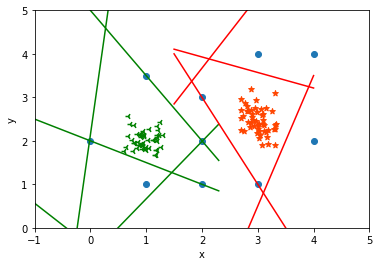

In [0]:
plt.scatter([1, 2, 3, 0, 2, 4, 2, 1, 3, 4], [1, 1, 1, 2, 2, 2, 3, 3.5, 4, 4])
plt.scatter(x1 ,x2, color='orangered', marker = "*") 
plt.xlim([-1, 5])
plt.ylim([0, 5])
plt.ylabel('y')
plt.xlabel('x')
plt.scatter(x1_green ,x2_green, color='green', marker = "3") 
for i in range(10):
  if i != 1 and i != 0 and i != 3 and i != 4 and i != 6:
    x , y = make_line(first_weights[i], first_bias[i], -1, 2.3)
    plt.plot(x, y , label = 'line' , color= 'green')
# plt.plot([b1 , b2], [b_out1, b_out2] , label = 'line' , color= 'green')
# plt.plot([c1 , c2], [c_out1, c_out2] , label = 'line' , color= 'red')
# plt.plot([d1 , d2], [d_out1, d_out2] , label = 'line' , color= 'blue')
# 

for i in range(10):
  if i != 2 and i != 13 and i != 14 and i != 16 and i != 17 and i != 18:
    x , y = make_line(second_weights[i], second_bias[i], 1.5, 4)
    plt.plot(x, y , label = 'line' , color= 'red')

# plt.plot([e1 , e2], [e_out1, e_out2] , label = 'line' , color= 'red')
# plt.plot([f1 , f2], [f_out1, f_out2] , label = 'line' , color= 'blue')







plt.show()